# Dark Energy Spectroscopic Instrument

Based on the ECHO-22 design with obscurations in [DESI-4037-v6](https://desi.lbl.gov/DocDB/cgi-bin/private/ShowDocument?docid=4037).

Corrector lens refractive properties taken from melt data in [DESI-2880](https://desi.lbl.gov/DocDB/cgi-bin/private/ShowDocument?docid=2880).

In [1]:
import batoid
from batoid.utils import normalized
import os
import yaml
import numpy as np
from ipywidgets import interact
import ipywidgets as widgets
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

In [2]:
DESI_fn = os.path.join(batoid.datadir, 'DESI', 'DESI.yaml')
config = yaml.safe_load(open(DESI_fn))
fiducial_telescope = batoid.parse.parse_optic(config['opticalSystem'])

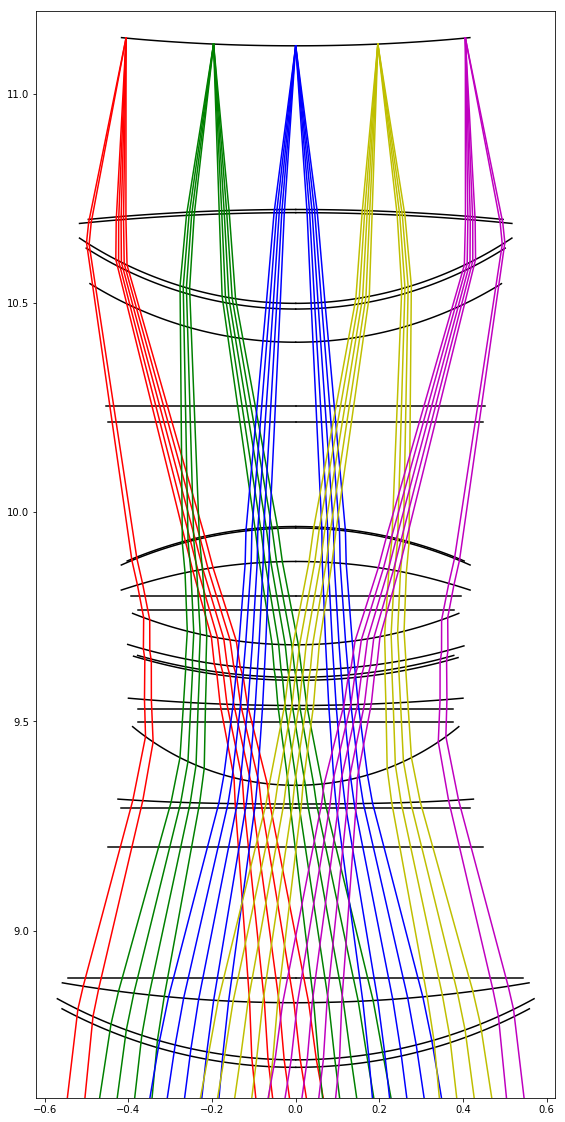

In [3]:
fig, ax = plt.subplots(figsize=(10, 20))
fiducial_telescope.draw2d(ax, c='k')

z_pupil = fiducial_telescope.dist
r_pupil = 0.5 * fiducial_telescope.pupilSize
x_pupil = np.linspace(-r_pupil, r_pupil, 20)

fov = np.deg2rad(3.2)
thetas = np.linspace(-0.5 * fov, +0.5 * fov, 5)
colors = 'r', 'g', 'b', 'y', 'm'
wlen = 500e-9

for theta, c in zip(thetas, colors):
    v = [np.sin(theta), 0., -np.cos(theta)]
    # Fill the pupil along y = 0.
    rays = batoid.RayVector([batoid.Ray([x, 0, z_pupil], v, t=0, wavelength=wlen) for x in x_pupil])
    traceFull = fiducial_telescope.traceFull(rays)
    batoid.drawTrace2d(ax, traceFull, c=c)
    
ax.set_xlim(-0.62, 0.62)
ax.set_ylim(8.6, 11.2)
ax.set_aspect(1.0)